## 셀레늄 환경 설정

- 크롬드라이브 다운로드 : https://chromedriver.chromium.org/downloads
- 셀레늄 서버 다운로드 : https://www.selenium.dev/downloads/


- 크롬드라이브는 크롬 버전을 확인하고 다운로드
- 크롬드라이브는 압축파일로 받으므로 압축 해제 후 driver 폴더로 이동
- 셀레늄 서버 파일은 그냥 selenium 폴더로 이동

In [ ]:
# 패키지 설치
# !pip install selenium
# !pip install bs4
# !pip install lxml

In [1]:
import os
from selenium import webdriver
from bs4 import BeautifulSoup as bts
import lxml

In [2]:
os.getcwd()

'C:\\Users\\14T90N-VR56K\\Documents\\Project\\code'

In [3]:
driver = webdriver.Chrome('C:\\Users\\14T90N-VR56K\\Documents\\Project\\driver\\chromedriver')

In [4]:
driver.get('https://datalab.naver.com/keyword/trendSearch.naver')

In [5]:
driver.implicitly_wait(3)

In [6]:
driver.find_element_by_xpath('//*[@id="item_keyword1"]').send_keys('메디헤어')

In [7]:
driver.find_element_by_xpath('//*[@id="startYear"]').click()

In [8]:
# 2021년 선택
driver.find_element_by_xpath('//*[@id="startYearDiv"]/ul/li[6]/a').click()

In [9]:
driver.find_element_by_xpath('//*[@id="startMonth"]').click()

In [10]:
# 01월 선택
driver.find_element_by_xpath('//*[@id="startMonthDiv"]/ul/li[1]/a').click()

In [11]:
driver.find_element_by_xpath('//*[@id="startDay"]').click()

In [12]:
# 01일 선택
driver.find_element_by_xpath('//*[@id="startDayDiv"]/ul/li[1]/a').click()

In [13]:
# 범위 전체 선택
driver.find_element_by_xpath('//*[@id="item_device_0"]').click()

In [14]:
# 성별 전체 선택
driver.find_element_by_xpath('//*[@id="item_gender_0"]').click()

In [15]:
# 연령 전체 선택
driver.find_element_by_xpath('//*[@id="item_age_0"]').click()

In [16]:
# 네이버 검색 데이터 조회 버튼 클릭
driver.find_element_by_xpath('//*[@id="content"]/div/div[2]/div[1]/div/form/fieldset/a').click()

In [17]:
# 현재 페이지 읽기
# html = driver.page_source
# soup = bts(html, 'lxml')
# index = soup.select('g.bb-event-rects.bb-event-rects-single > rect')

In [18]:
# 엑셀 파일 다운로드
driver.find_element_by_xpath('//*[@id="content"]/div/div[1]/div[1]/div/div/div/div/div/div[1]/div[4]/a').click()

In [19]:
driver.close()

In [20]:
os.chdir('C:/Users/14T90N-VR56K/Downloads')

In [21]:
os.listdir()

['(서울과학종합대학원)2021년 계층별 리더십 교육 제안서 요청.pdf',
 '0.성명직위_FIDAS Advanced_Test3.docx',
 'datalab.xlsx',
 'desktop.ini',
 'gensim-3.8.3-cp39-cp39-win_amd64.whl',
 'jdk-8u281-windows-x64.exe',
 'JPype1-1.2.0-cp39-cp39-win_amd64.whl',
 'LG 쉬는시간 장표.pptx',
 'titanic.zip',
 'TMONBlack.ttf',
 'wordcloud-1.8.1-cp39-cp39-win_amd64.whl',
 '두산인프라코어_FIDAS Advanced_운영멘트_210326 정리.docx',
 '띄울화면.pptx',
 '붙임1. 2021년 계층별 리더십교육 운영용역 과업내용서.pdf',
 '붙임2. 2021년 계층별 리더십교육 운영용역 제안요청서.pdf',
 '코인들.pptx']

In [22]:
import pandas as pd

In [23]:
naver = pd.read_excel('datalab.xlsx', skiprows = 6)

c:\users\14t90n-vr56k\appdata\local\programs\python\python39\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [24]:
naver

,날짜,메디헤어
0,2021-01-01,1.59726
1,2021-01-02,1.78741
2,2021-01-03,2.28180
3,2021-01-04,4.03118
4,2021-01-05,3.34664
...,...,...
86,2021-03-28,5.59041
87,2021-03-29,7.09260
88,2021-03-30,6.40806
89,2021-03-31,5.32420


In [25]:
naver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      91 non-null     object 
 1   메디헤어    91 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.5+ KB


In [26]:
naver['날짜'] = naver['날짜'].astype('datetime64')

In [27]:
naver = naver.loc[naver['날짜'] >= '2021-01-01']

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [29]:
fontList = fm.findSystemFonts(fontext = 'ttf')

In [30]:
[font for font in fontList if 'Gamja' in font]

['C:\\Users\\14T90N-VR56K\\AppData\\Local\\Microsoft\\Windows\\Fonts\\GamjaFlower-Regular.ttf']

In [31]:
fontPath = 'C:\\Users\\14T90N-VR56K\\AppData\\Local\\Microsoft\\Windows\\Fonts\\GamjaFlower-Regular.ttf'
fontProp = fm.FontProperties(fname = fontPath)

In [32]:
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.family'] = fontProp.get_name()
plt.rcParams['font.size'] = 14

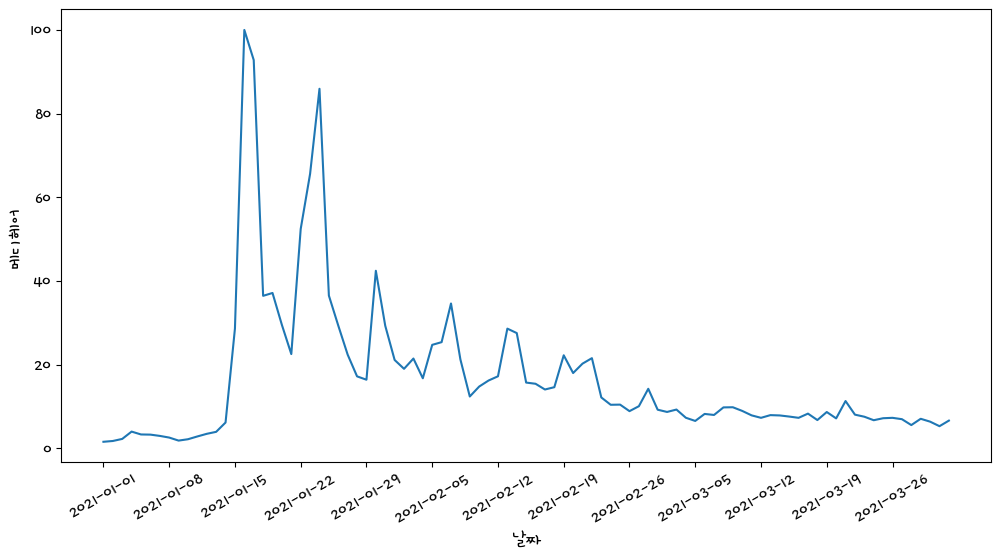

In [33]:
sns.lineplot(data = naver, x = '날짜', y = '메디헤어', )
plt.xticks(ticks = naver['날짜'][::7], rotation = 30)
plt.show()